<a href="https://colab.research.google.com/github/vatsalvasani/CE155_VATSAL_VASANI_ML_LABS/blob/main/LAB%2012/LAB_12_LABWORK_EXRECISE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LAB 12 : LABWORK AND EXRERCISE**

# **Step Involve In Creating Model :**
1) Load MNIST Dataset

2) Preprocessing Dataset

3) Create DataLoader

4) Create ANN Model With One Hideen Layer

5) Define Criterion As EL And Optimizer As SGD

6) Train Model

7) Predict Digit

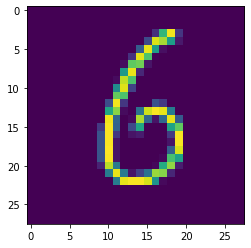

num_epochs :  5000


<ipython-input-3-cfa1bc57bb2c>:55: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  trainset=np.array(list(zip(X_train,y_train)))
<ipython-input-3-cfa1bc57bb2c>:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  trainset=np.array(list(zip(X_train,y_train)))


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import tensorflow
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import MinMaxScaler
from random import random

def flatten(X_data):
  flatten_data=[]
  for i in range(len(X_data)):
    sample=X_data[i]
    flatten_row=[]
    for row in sample:
      flatten_row+=list(row)
      pass
    pass
    flatten_data.append(np.array(flatten_row,dtype='float32'))
    pass
  return np.array(flatten_data)
  pass


(X_train, y_train), (X_test,y_test) = mnist.load_data()

X_train=X_train[0:100]
y_train=y_train[0:100]

# visualize one of the images in data set
sample_image_mat=X_train[int(random()*len(X_train))]
plt.imshow(sample_image_mat)
plt.show()

X_train=flatten(X_train)

scaler = MinMaxScaler().fit(X_train)
X_train=scaler.transform(X_train)

X_train=torch.tensor(X_train)

y_train=torch.tensor(y_train)

batch_size = 100
n_iters = 5000

num_epochs = n_iters / (len(X_train) / batch_size)
num_epochs = int(num_epochs)

print("num_epochs : ",num_epochs)
trainset=np.array(list(zip(X_train,y_train)))
trainloader = DataLoader(trainset, batch_size=batch_size,shuffle=True)



# **EXERCISE**

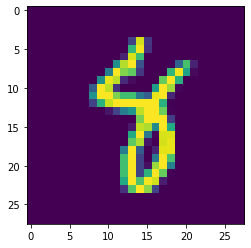

tensor(5, dtype=torch.uint8)
Number Of Epochs :  250
prediction : 8


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import TensorDataset,DataLoader
import tensorflow
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import MinMaxScaler
from random import random

def flatten(X_data):
    flatten_data=[]
    for i in range(len(X_data)):
        sample=X_data[i]
        flatten_row=[]
        for row in sample:
            flatten_row+=list(row)
        flatten_data.append(np.array(flatten_row,dtype='float32'))
    return np.array(flatten_data)

class ANNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.sigmoid = nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.sigmoid(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out

    def predict(self,x):
        output=self.forward(x).tolist()[0]
        lbl=output.index(max(output))
        return lbl
        pass

(X_train, y_train), (X_test,y_test) = mnist.load_data()

X_train=X_train[0:200]
y_train=y_train[0:200]

sample_image_mat=X_train[int(random()*len(X_train))]
plt.imshow(sample_image_mat)
plt.show()

X_train=flatten(X_train)

scaler = MinMaxScaler().fit(X_train)
X_train=scaler.transform(X_train)

X_train=torch.tensor(X_train)
y_train=torch.tensor(y_train)

print(y_train[0])

batch_size = 10
n_iters = 5000

num_epochs = n_iters / (len(X_train) / batch_size)
num_epochs = int(num_epochs)

print("Number Of Epochs : ",num_epochs)
trainset=TensorDataset(X_train,y_train)
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)



input_dim = X_train.shape[1]
hidden_dim = 100
output_dim = 10

model = ANNModel(input_dim, hidden_dim, output_dim)

criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(trainloader):
    inputs = Variable(images.view(-1, input_dim))
    labels = Variable(labels)
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    pass
  pass


sample=torch.tensor(flatten([sample_image_mat]))
print("prediction :",model.predict(sample))
# y_pred=torch.tensor(model.predict(X_test))
# print(accuracy_score(y_test,y_pred))

---> Q4 Of Exercise

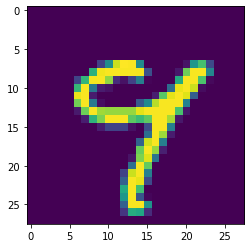

tensor(5, dtype=torch.uint8)
num_epochs :  1000


/usr/local/lib/python3.9/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[5]


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import TensorDataset,DataLoader
import tensorflow
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from random import random

def flatten(X_data):
    flatten_data=[]
    for i in range(len(X_data)):
        sample=X_data[i]
        flatten_row=[]
        for row in sample:
            flatten_row+=list(row)
        flatten_data.append(np.array(flatten_row,dtype='float32'))
    return np.array(flatten_data)

class ANNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim1,hidden_dim2, output_dim):
        super(ANNModel, self).__init__()
        self.sigmoid = nn.Sigmoid()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, output_dim)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.sigmoid(out)
        out = self.fc2(out)
        out = self.sigmoid(out)

        
        return out

    def predict(self,x):
        
        output=self.forward(x).tolist()
        output_labels=[]
        for elem in output : 
          lbl=elem.index(max(elem))
          output_labels.append(lbl)
        output_labels=np.array(output_labels)
        return output_labels
        pass

(X_train, y_train), (X_test,y_test) = mnist.load_data()

X_train=X_train[0:100]
X_test=X_test[0:100]
y_train=y_train[0:100]
y_test=y_test[0:100]

sample_image_mat=X_train[int(random()*len(X_train))]
plt.imshow(sample_image_mat)
plt.show()

X_train=flatten(X_train)
X_test=flatten(X_test)

scaler = MinMaxScaler().fit(X_train)
X_train=scaler.transform(X_train)

X_train=torch.tensor(X_train)
X_test=torch.tensor(X_test)
y_train=torch.tensor(y_train)
y_test=torch.tensor(y_test)

print(y_train[0])

batch_size = 10
n_iters = 10000

num_epochs = n_iters / (len(X_train) / batch_size)
num_epochs = int(num_epochs)

print("num_epochs : ",num_epochs)
trainset=TensorDataset(X_train,y_train)
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)


input_dim = X_train.shape[1]
hidden_dim1 = 10
hidden_dim2 = 10
output_dim = 10

model = ANNModel(input_dim, hidden_dim1,hidden_dim2, output_dim)

criterion=nn.MSELoss()

learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(trainloader):
    inputs = Variable(images.view(-1, input_dim))
    labels = Variable(labels)
    optimizer.zero_grad()
    outputs=model(inputs)
    loss = criterion(outputs, labels)
    optimizer.step()
    pass
  pass


sample=torch.tensor(flatten([sample_image_mat]))
print(model.predict(sample))
# y_pred=torch.tensor(model.predict(X_test))
# print(accuracy_score(y_test,y_pred))